4장 - pymc2


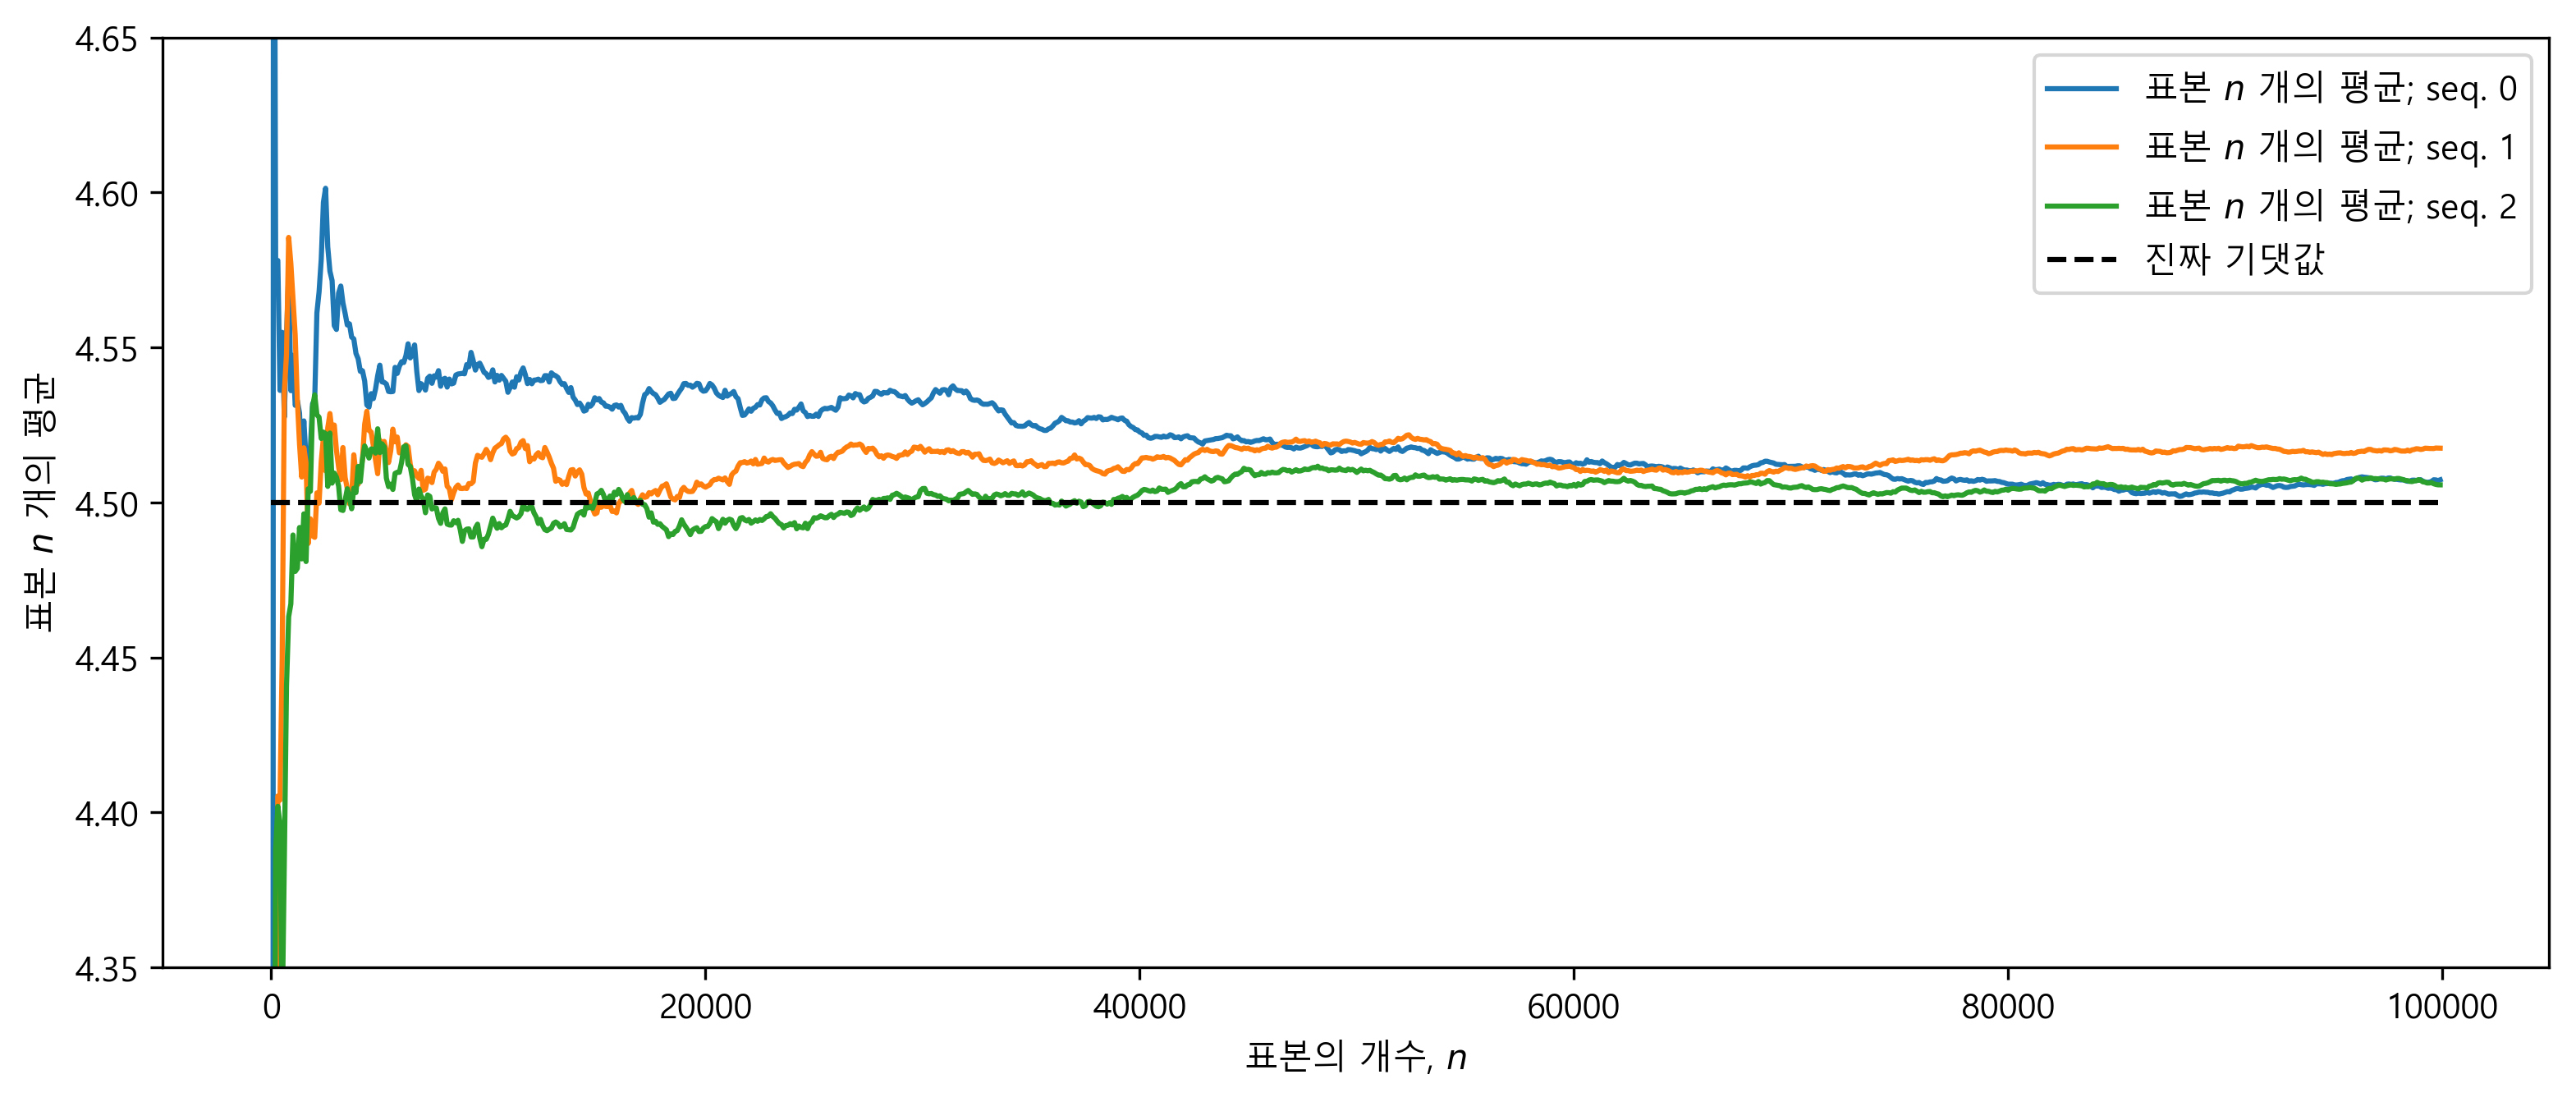

In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
figsize(12.5, 5)
import pymc as pm

sample_size = 100000
expected_value = lambda_ = 4.5
poi = pm.rpoisson
N_samples = range(1, sample_size, 100)

for k in range(3):

    samples = poi(lambda_, size=sample_size)

    partial_average = [samples[:i].mean() for i in N_samples]

    plt.plot(N_samples, partial_average, lw=1.5, label="표본 $n$ 개의 평균; seq. %d" % k)


plt.plot(N_samples, expected_value * np.ones_like(partial_average),
         ls="--", label="진짜 기댓값", c="k")

plt.ylim(4.35, 4.65)
#plt.title("확률변수의 평균은 그 기댓값으로 수렴한다")
plt.ylabel("표본 $n$ 개의 평균")
plt.xlabel("표본의 개수, $n$")
plt.legend();

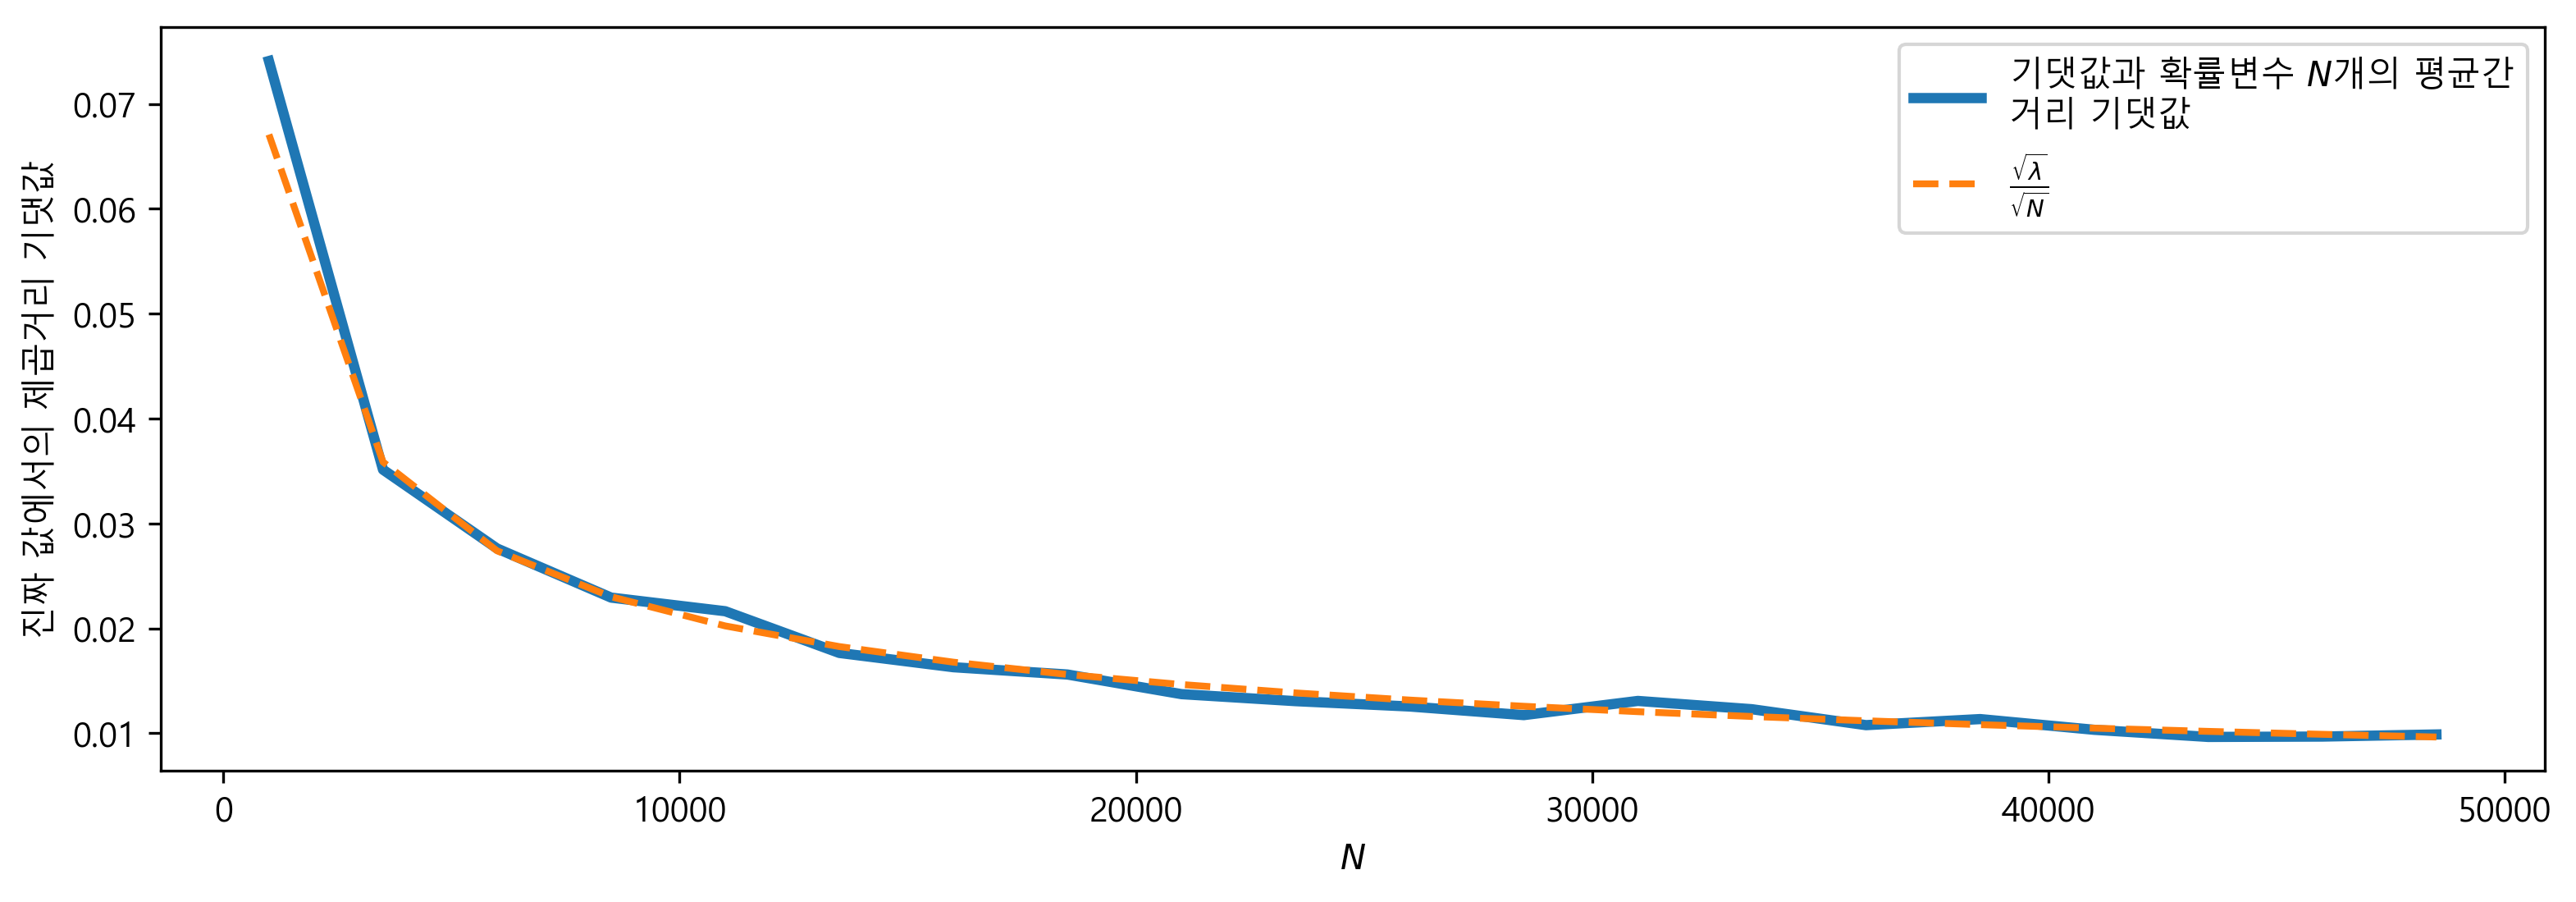

In [2]:
figsize(12.5, 4)

N_Y = 250  # D(N)에 근사하기 위해 크게 잡는다 use this many to approximate D(N)
N_array = np.arange(1000, 50000, 2500)  # 변수에 많은 표본을 근사 use this many samples in the approx. to the variance.
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_  # for X ~ Poi(lambda) , E[ X ] = lambda


def D_N(n):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    """
    이 함수는 표본 n개를 사용한 평균분산인 D_n에 근사한다
    """
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())


for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)


plt.xlabel("$N$")
plt.ylabel("진짜 값에서의 제곱거리 기댓값")
plt.plot(N_array, D_N_results, lw=3,label="기댓값과 확률변수 $N$개의 평균간\n거리 기댓값")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
#plt.title("표본의 평균이 얼마나 빨리 수렴하는가?");

In [3]:
import pymc as pm
N = 10000
print(np.mean([pm.rexponential(0.5) > 10 for i in range(N)]))

0.008


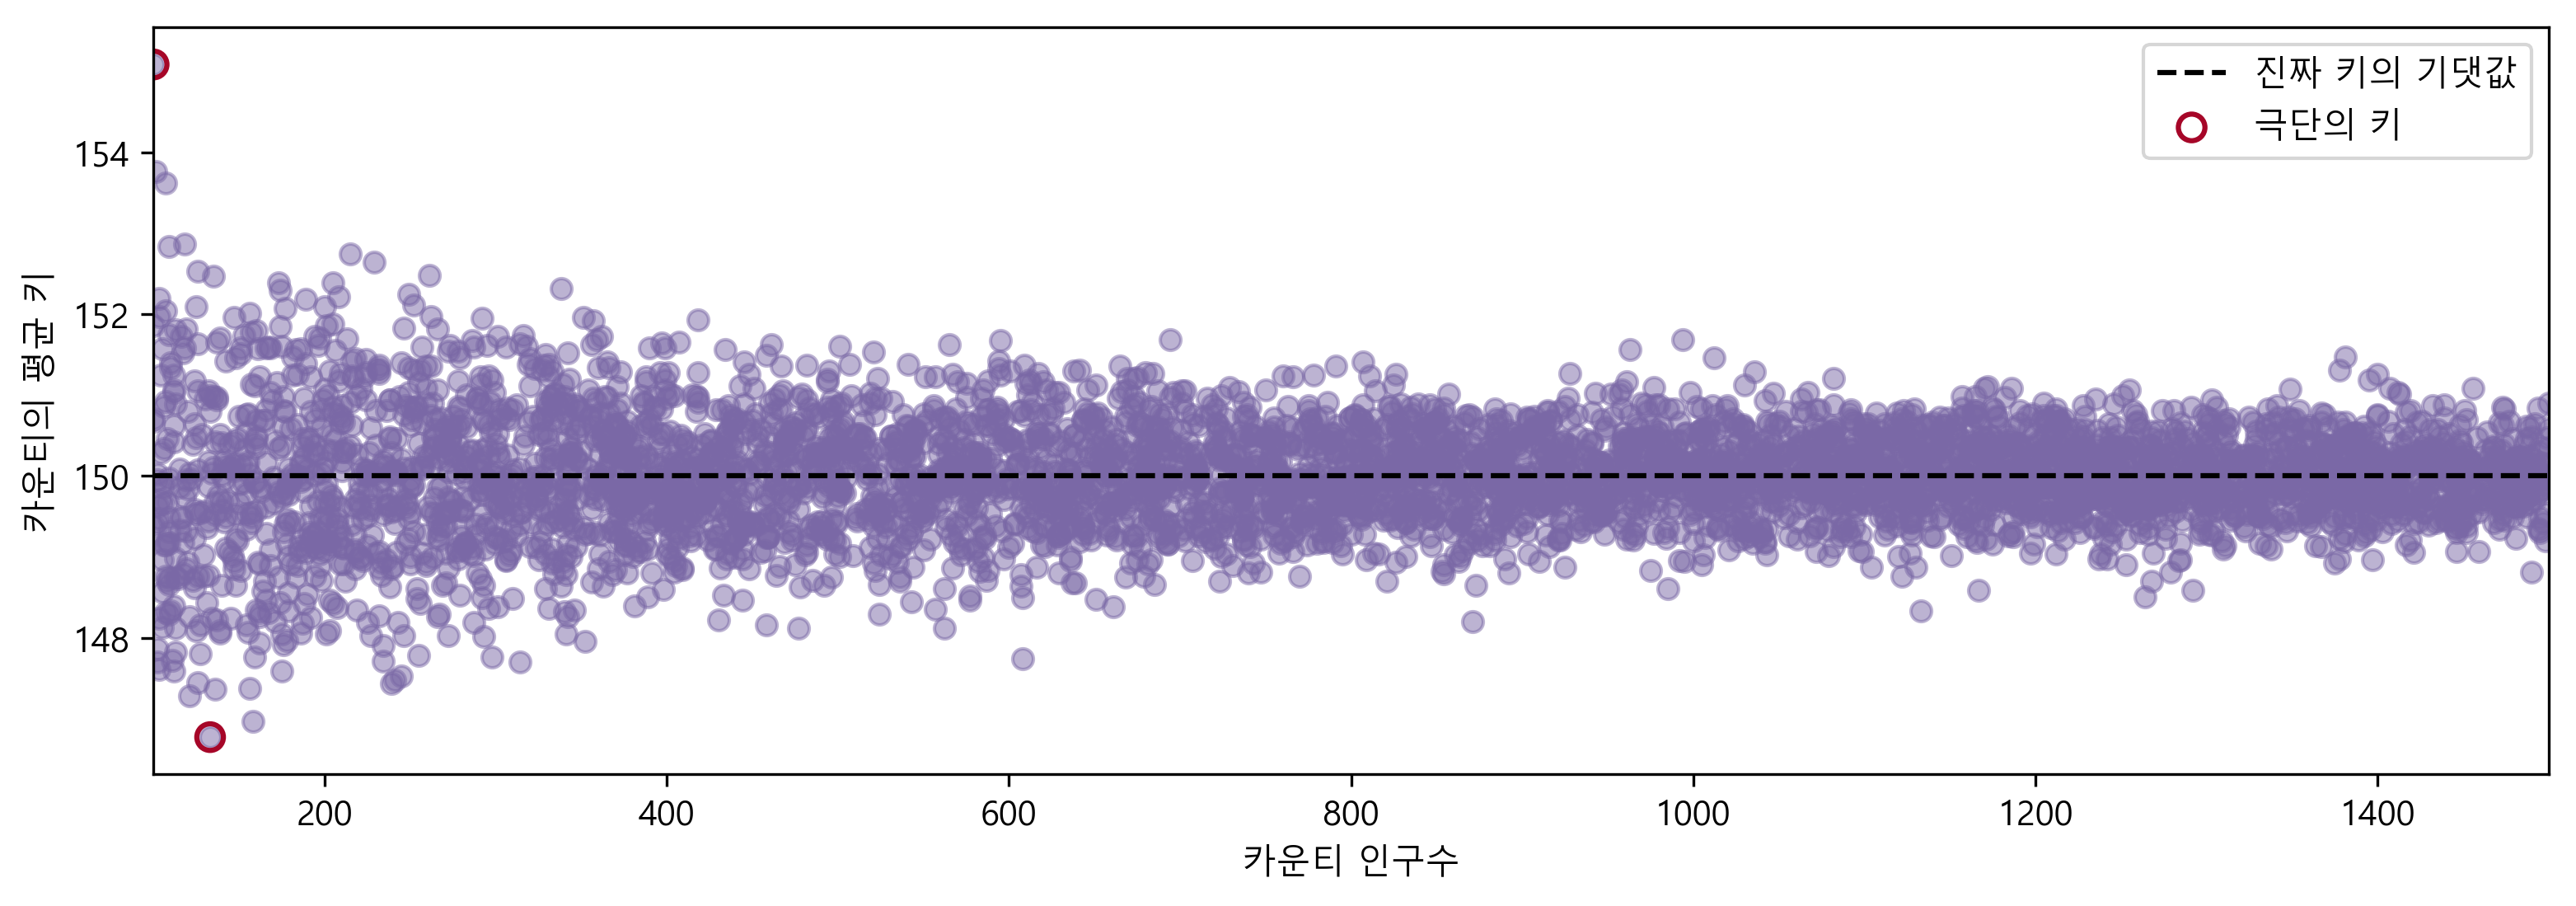

In [4]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

# generate some artificial population numbers
# 인위적인 인구수를 만든다
population = pop_generator(100, 1500, size=n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    # generate some individuals and take the mean
    # 개인들을 만들고 평균을 취한다
    average_across_county[i] = norm(mean_height, 1. / std_height ** 2,
                                    size=population[i]).mean()

# located the counties with the apparently most extreme average heights.
# 분명하게 극단적인 평균 키를 보여주는 카운티를 특정한다
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

# plot population size vs. recorded average
# 인구 크기 대 평균을 작도한다
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="극단의 키")

plt.xlim(100, 1500)
#plt.title("평균 키 대 카운티 인구수")
plt.xlabel("카운티 인구수")
plt.ylabel("카운티의 평균 키")
plt.plot([100, 1500], [150, 150], color="k", label="진짜 키의 \
기댓값", ls="--")
plt.legend(scatterpoints=1);

In [5]:
print("가장 키가 작은 10개의 카운티 인구 크기: ")
print(population[np.argsort(average_across_county)[:10]])
print("\n가장 키가 작은 10개의 카운티 인구 크기: ")
print(population[np.argsort(-average_across_county)[:10]])

가장 키가 작은 10개의 카운티 인구 크기: 
[133 158 121 136 156 239 126 241 245 112]

가장 키가 작은 10개의 카운티 인구 크기: 
[100 101 107 118 109 215 229 126 261 135]


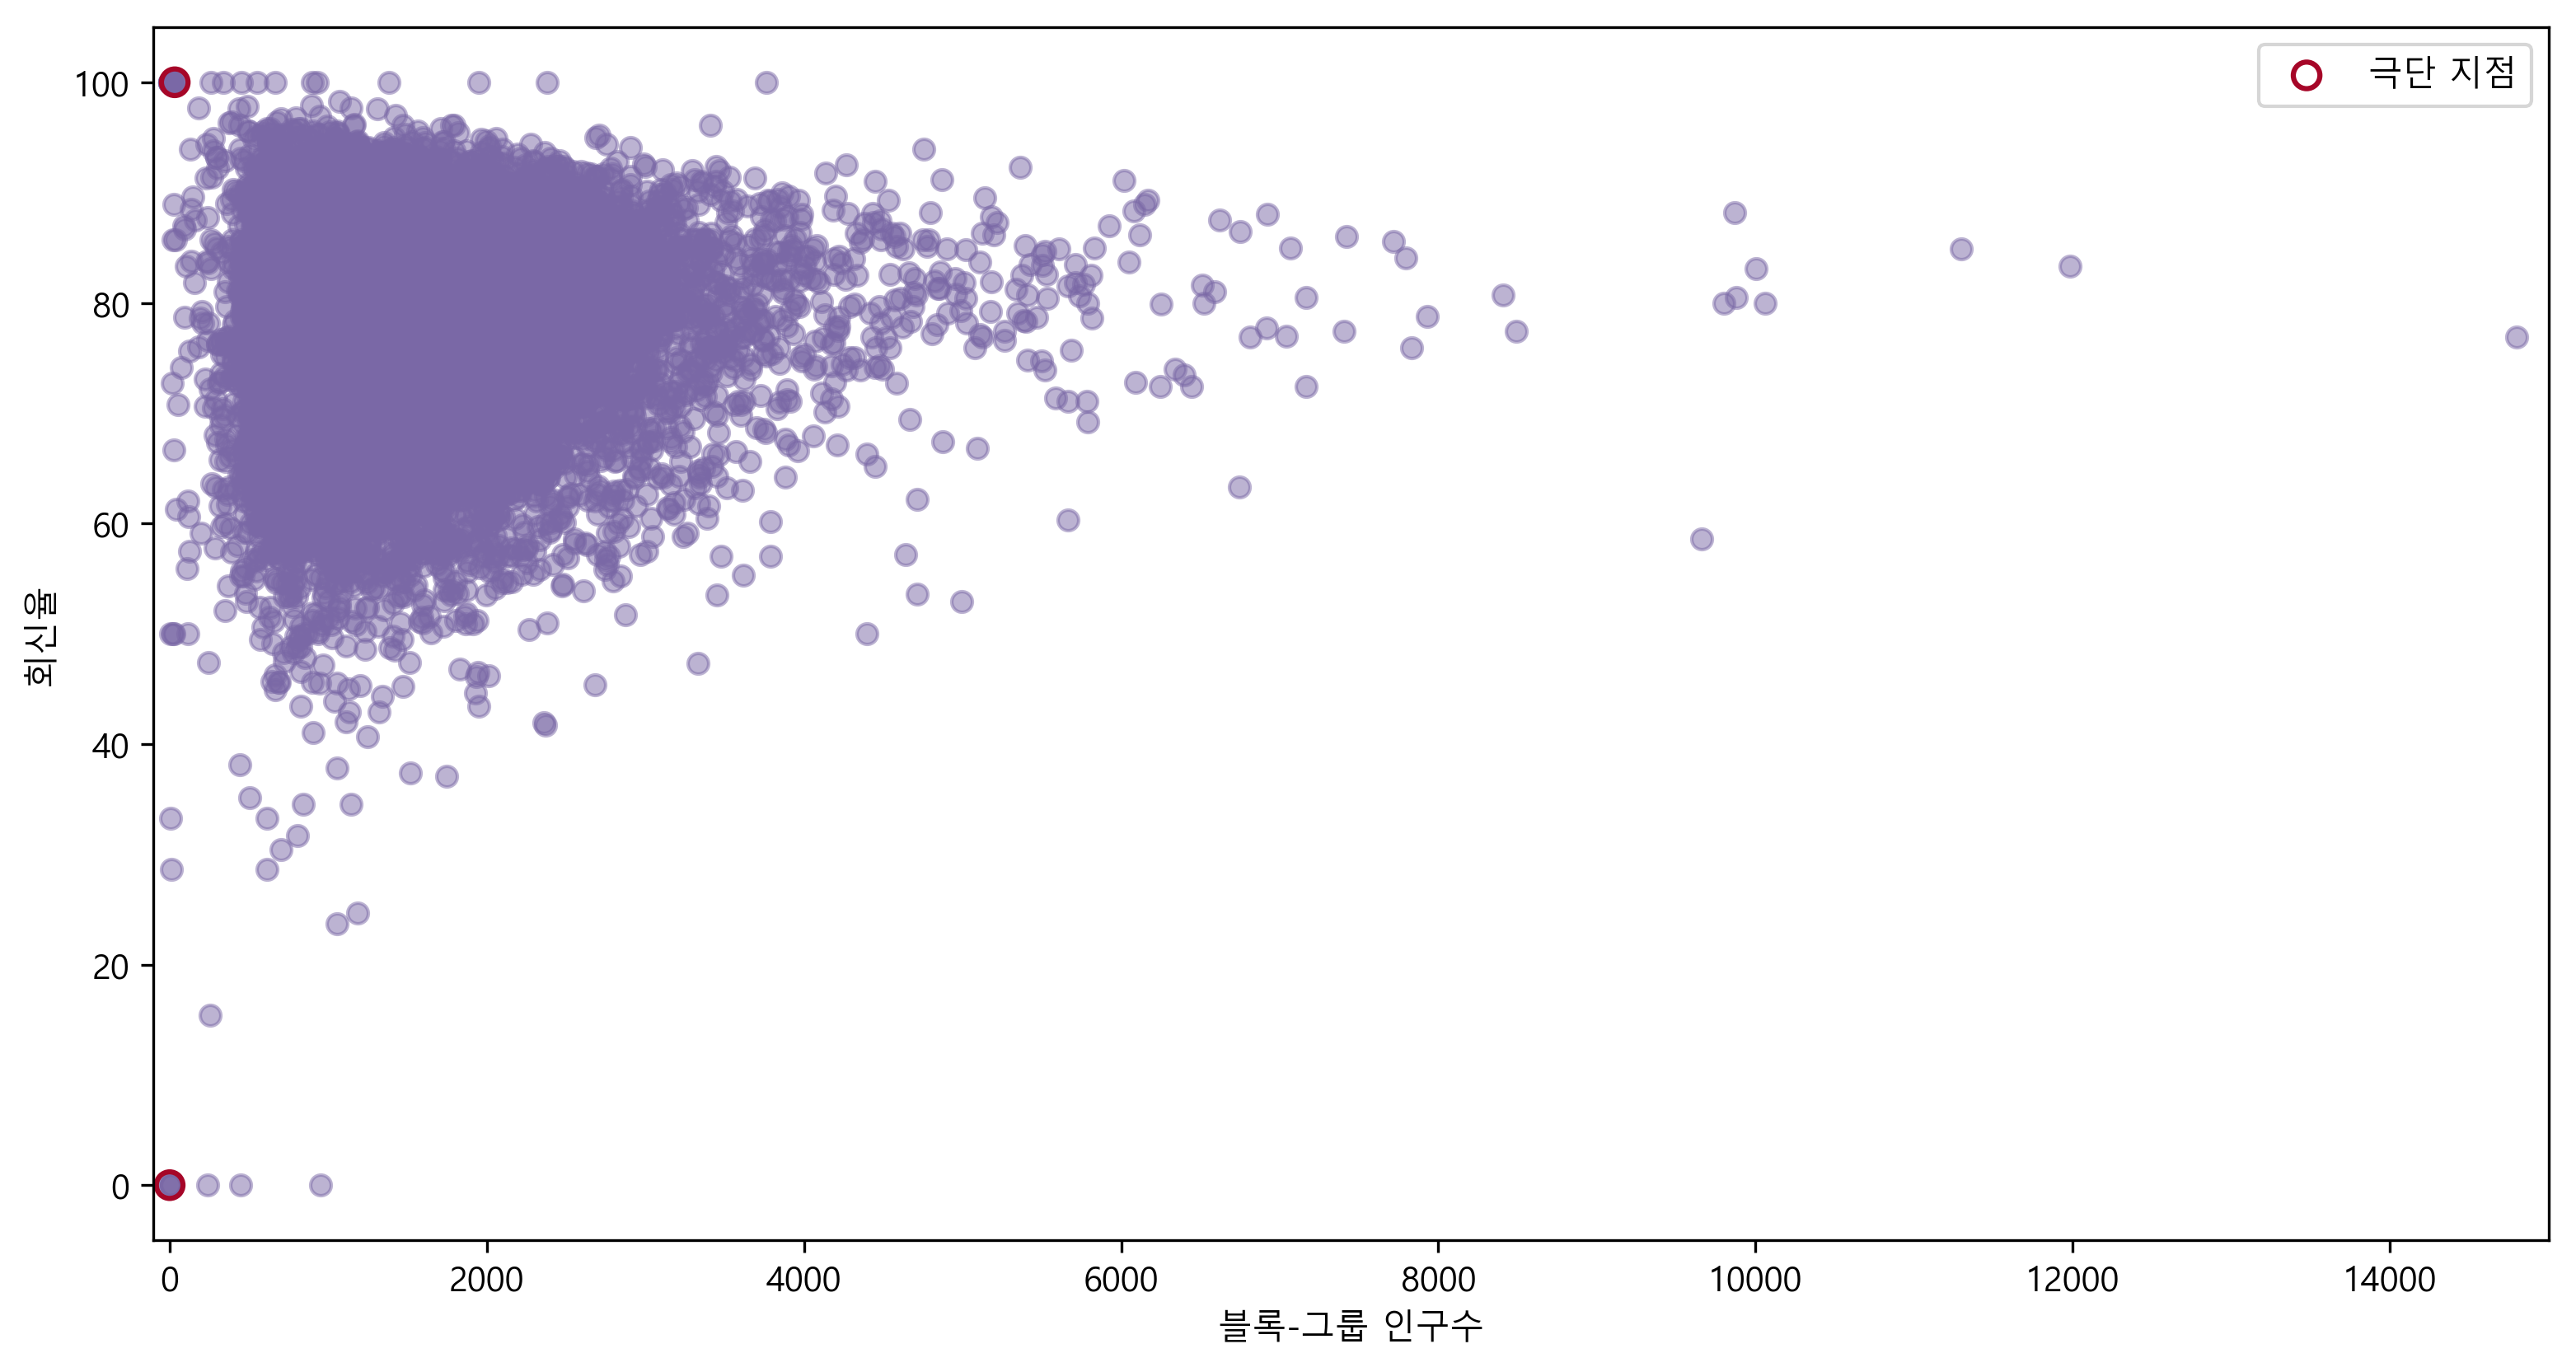

In [6]:
figsize(12.5, 6.5)
data = np.genfromtxt(r"C:\Users\wh\006775\Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master\Chapter4_TheGreatestTheoremNeverTold\data\census_data.csv", skip_header=1,
                     delimiter=",")
plt.scatter(data[:, 1], data[:, 0], alpha=0.5, c="#7A68A6")
#plt.title("인구수 대비 인구조사 우편물 회신율 조사")
plt.ylabel("회신율")
plt.xlabel("블록-그룹 인구수")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)

i_min = np.argmin(data[:, 0])
i_max = np.argmax(data[:, 0])

plt.scatter([data[i_min, 1], data[i_max, 1]],
            [data[i_min, 0], data[i_max, 0]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="극단 지점")

plt.legend(scatterpoints=1);

In [7]:
from IPython.core.display import Image
# Adding a number to the end of the %run call will get the ith top photo.
#
%run top_pic_comments.py 2

Title of submission: 
 I took 5 pictures with my drone and stitched them together to create this inception style picture.
https://i.imgur.com/O2vfxdf.jpg


In [8]:
"""
Contents: an array of the text from all comments on the pic
Votes: a 2D NumPy array of upvotes, downvotes for each comment
"""
"""
번역
"""
n_comments = len(contents)
comments = np.random.randint( n_comments, size=4)
print("Some Submissions (out of %d total) \n-----------"%n_comments)
for i in comments:
    print('"' + contents[i] + '"')
    print("upvotes/downvotes: ",votes[i,:])
    print('\n')

Some Submissions (out of 134 total) 
-----------
"I heard the BOOOOOOOOOWWW in my head as soon as I opened this"
upvotes/downvotes:  [14  0]


"A+ for originality, man. You can make some serious doe with this type of stuff. "
upvotes/downvotes:  [2 0]


"I took 5 pictures with my drone and stitched them together to create this ~~inception~~ **Ringworld**-style picture.

FTFY."
upvotes/downvotes:  [2 0]


"The road makes it look like you're on a fucking halo."
upvotes/downvotes:  [3 0]




In [9]:
import pymc as pm


def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    This function accepts the number of upvotes and downvotes a particular submission received, 
    and the number of posterior samples to return to the user. Assumes a uniform prior.
    """
    """
    이 함수는 어느 특정 제안에 대한 upvotes 와 downvotes의 수를 받는다
    그리고 사후표본의 갯수를 돌려준다. Uniform 사전확률분포를 가정한다
    """
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    # do the fitting; first do a MAP as it is cheap and useful.
    #  피팅(fitting)을 한다; 우선 MAP를 사용한다. 손쉽고 유용하기 때문이다
    map_ = pm.MAP([upvote_ratio, observations]).fit()
    mcmc = pm.MCMC([upvote_ratio, observations])
    mcmc.sample(samples, samples / 4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 0.7 sec

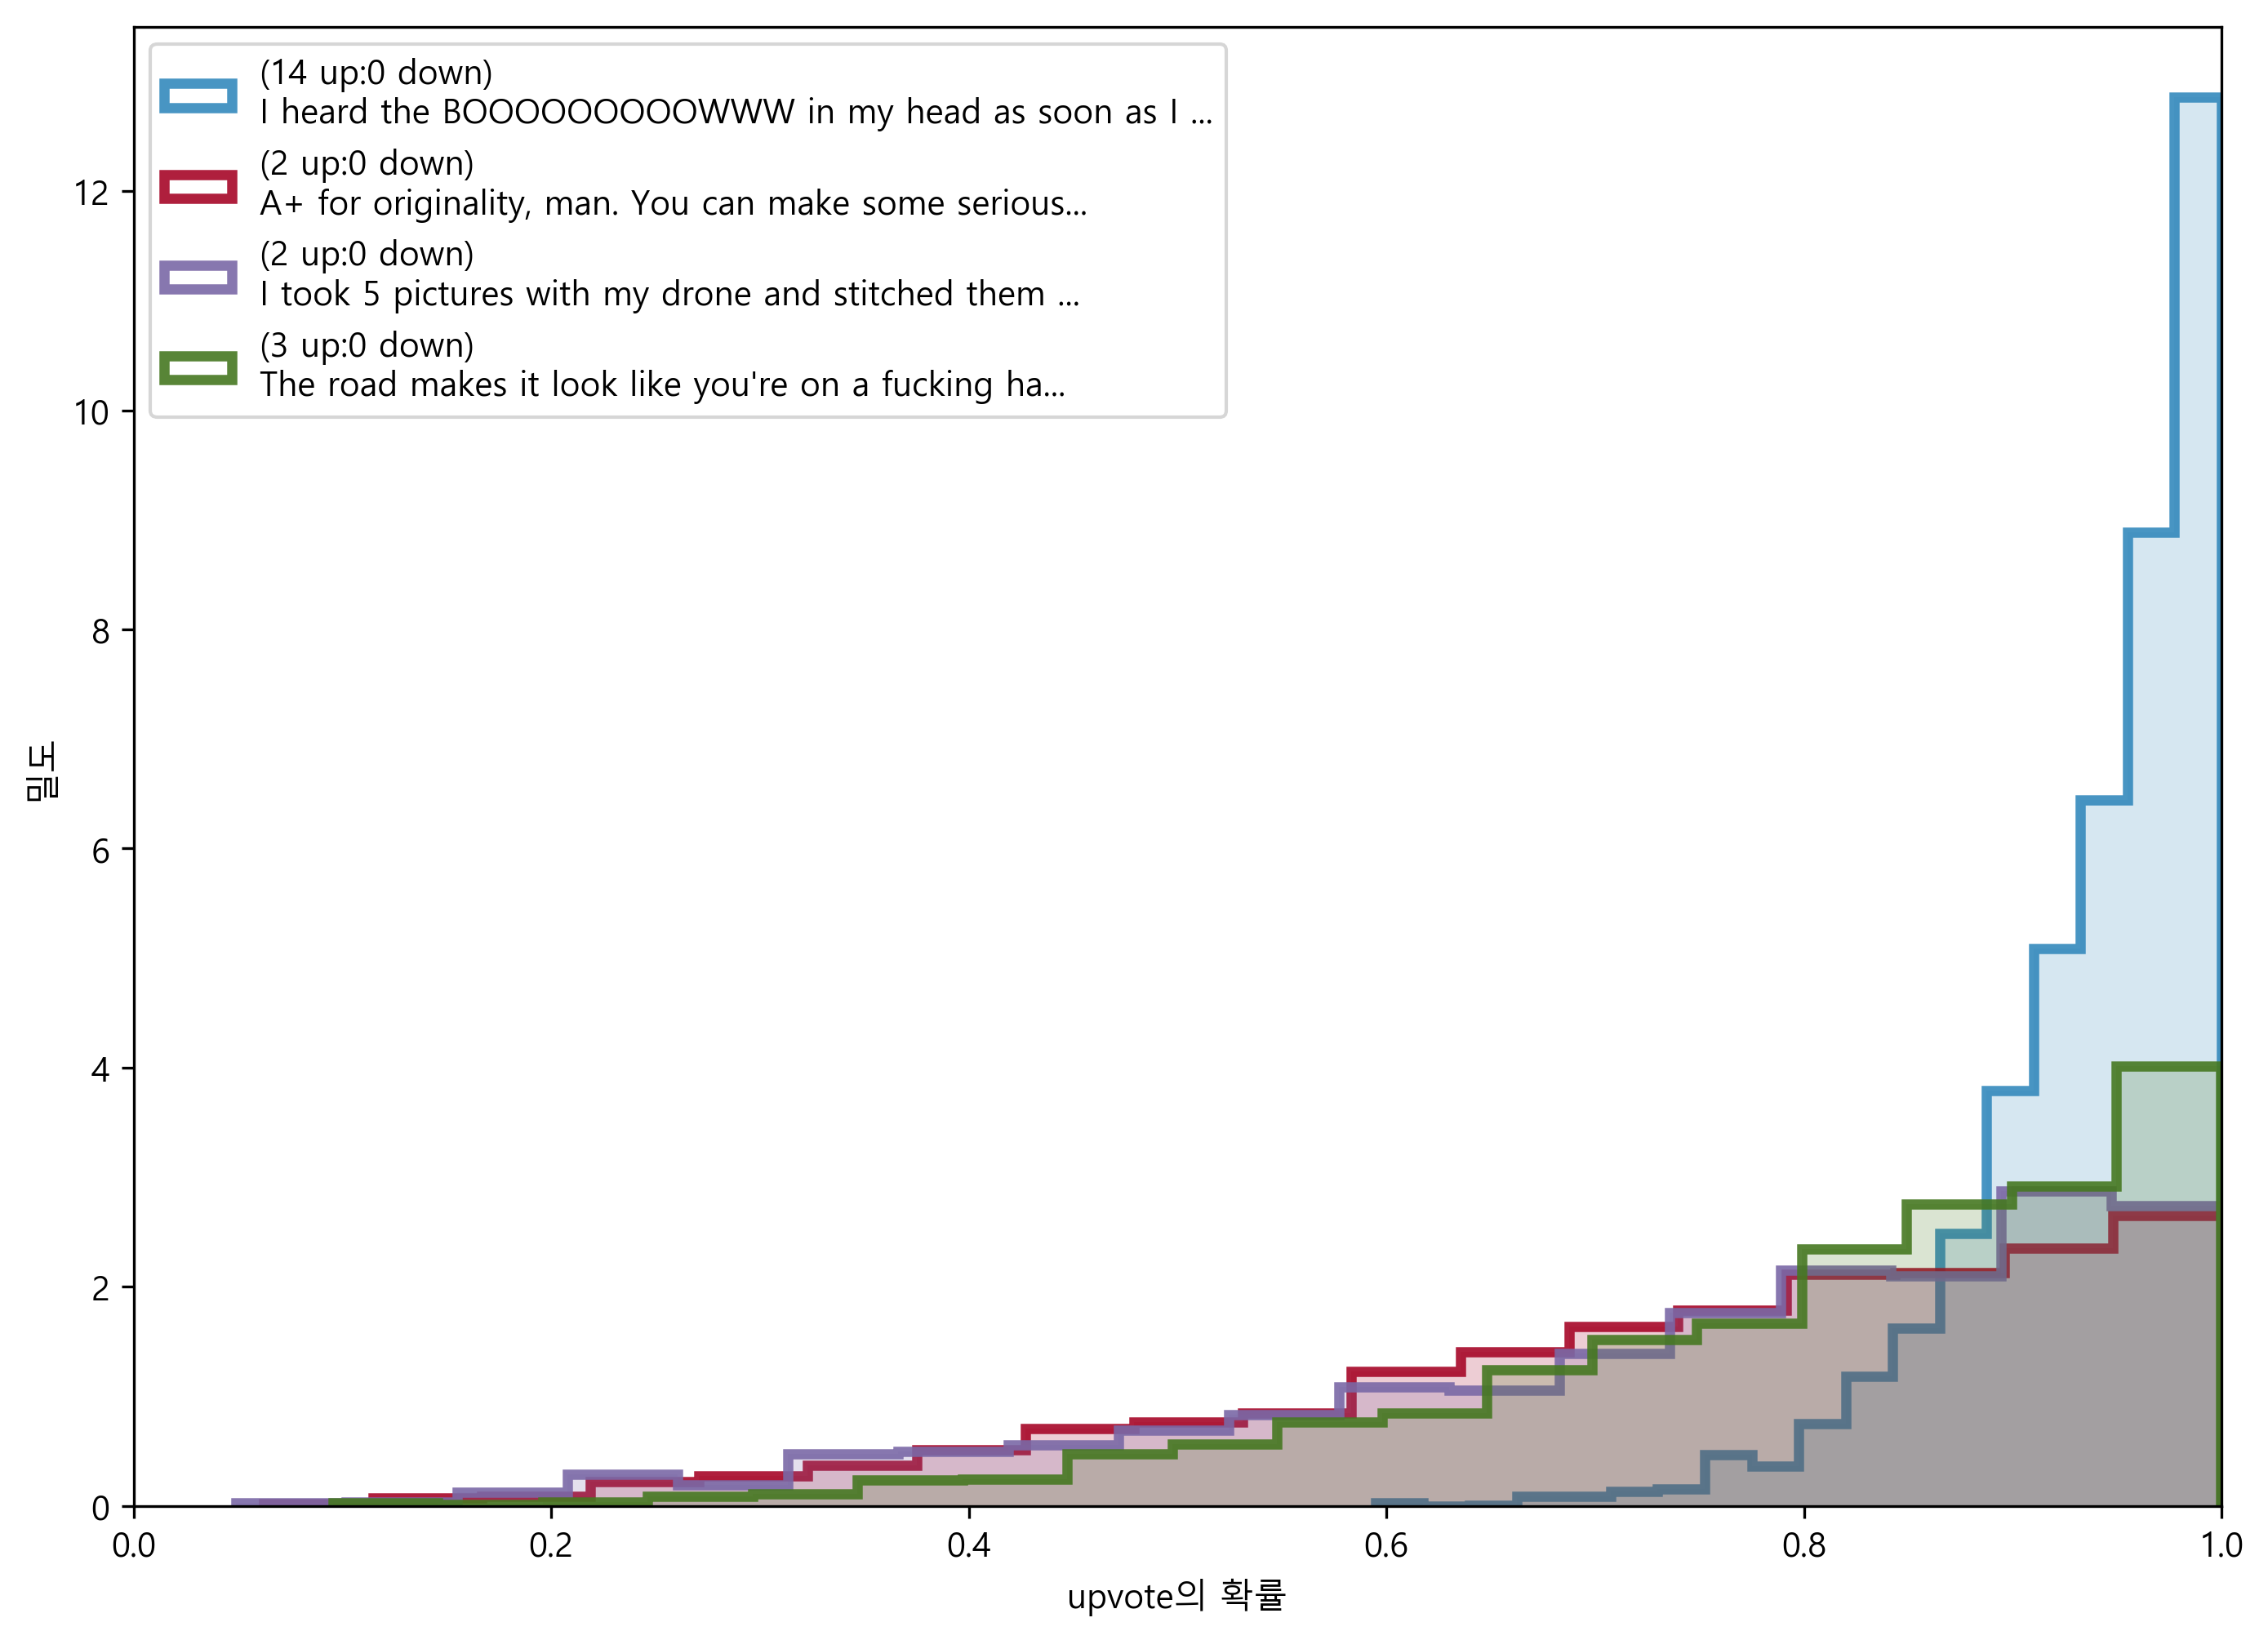

In [10]:
figsize(11., 8)
posteriors = []
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(comments)):
    j = comments[i]
    label = '(%d up:%d down)\n%s...'%(votes[j, 0], votes[j,1],contents[j][:50])
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j,1]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.9,histtype="step", color=colours[i%5], lw=3,label=label)
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.2,histtype="stepfilled", color=colours[i], lw=3)
    
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylabel("밀도")
plt.xlabel("upvote의 확률")
#plt.title("여러 코멘트에 대한 upvotes율의 사후확률분포");

[0 3 1 2] [0.8234056343433438, 0.3638470657210563, 0.35301601084111844, 0.46901893865140898]


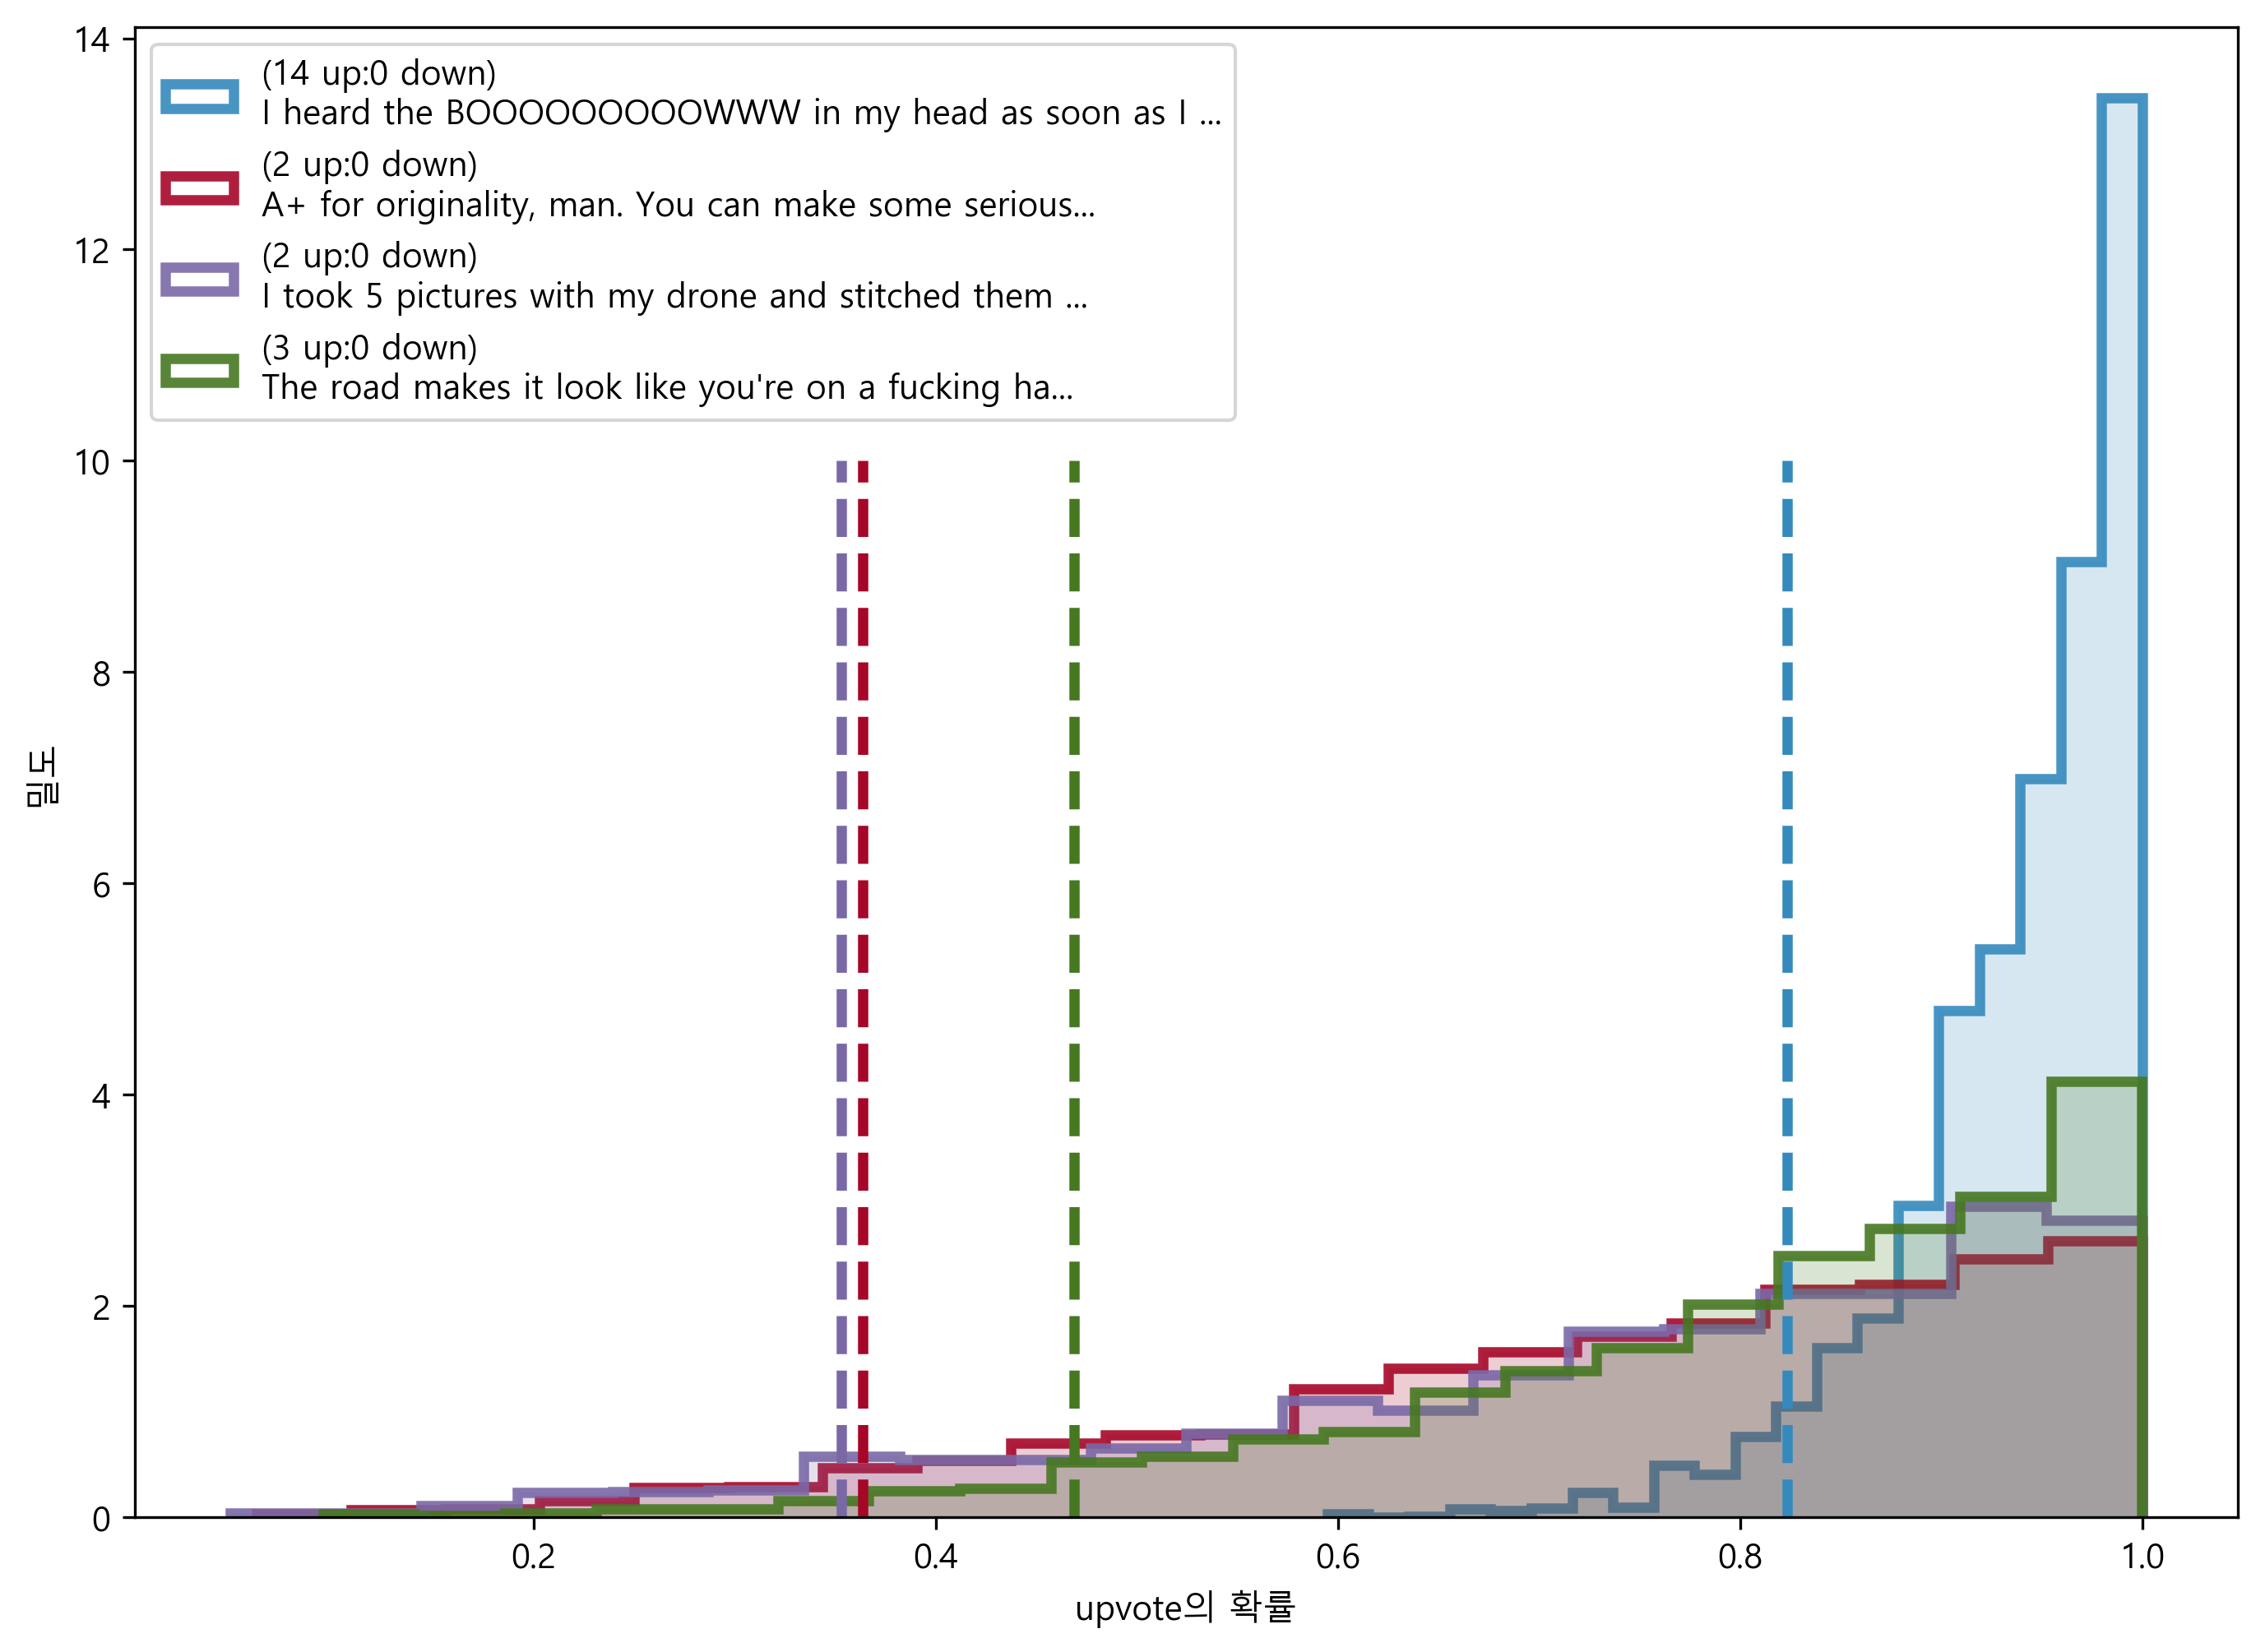

In [11]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(comments)):
    j = comments[i]
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    v = np.sort(posteriors[i])[int(0.05 * N)]
    # plt.vlines( v, 0, 15 , color = "k", alpha = 1, linewidths=3 )
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--", linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.xlabel("upvote의 확률")
plt.ylabel("밀도")
#plt.title("여러 코멘트에 대한 upvotes율의 사후확률분포");
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

In [12]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a / (a + b)
    std_err = 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1.)))
    return (mu, std_err)

print("하한선 근삿값:")
posterior_mean, std_err = intervals(votes[:, 0], votes[:, 1])
lb = posterior_mean - std_err
print(lb)
print("\n")
print("하한선 근삿값에 따라 추린 상위 40:")
print("\n")
order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print(votes[i, 0], votes[i, 1], contents[i])
    print("-------------")

Approximate lower bounds:
[ 0.99871148  0.99933058  0.99968379  0.99751319  0.99409303  0.96193829
  0.9948506   0.96713122  0.95699723  0.95401224  0.93925433  0.84063093
  0.8188524   0.93139117  0.87152685  0.87152685  0.91620627  0.77216027
  0.6530083   0.92956778  0.60091591  0.77216027  0.60091591  0.60091591
  0.6931046   0.9985826   0.6530083   0.77216027  0.72491057  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.72491057  0.72491057  0.6931046   0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.27775794
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887 

([<matplotlib.axis.YTick at 0x1ef9da85a90>,
 <a list of 40 Text yticklabel objects>)

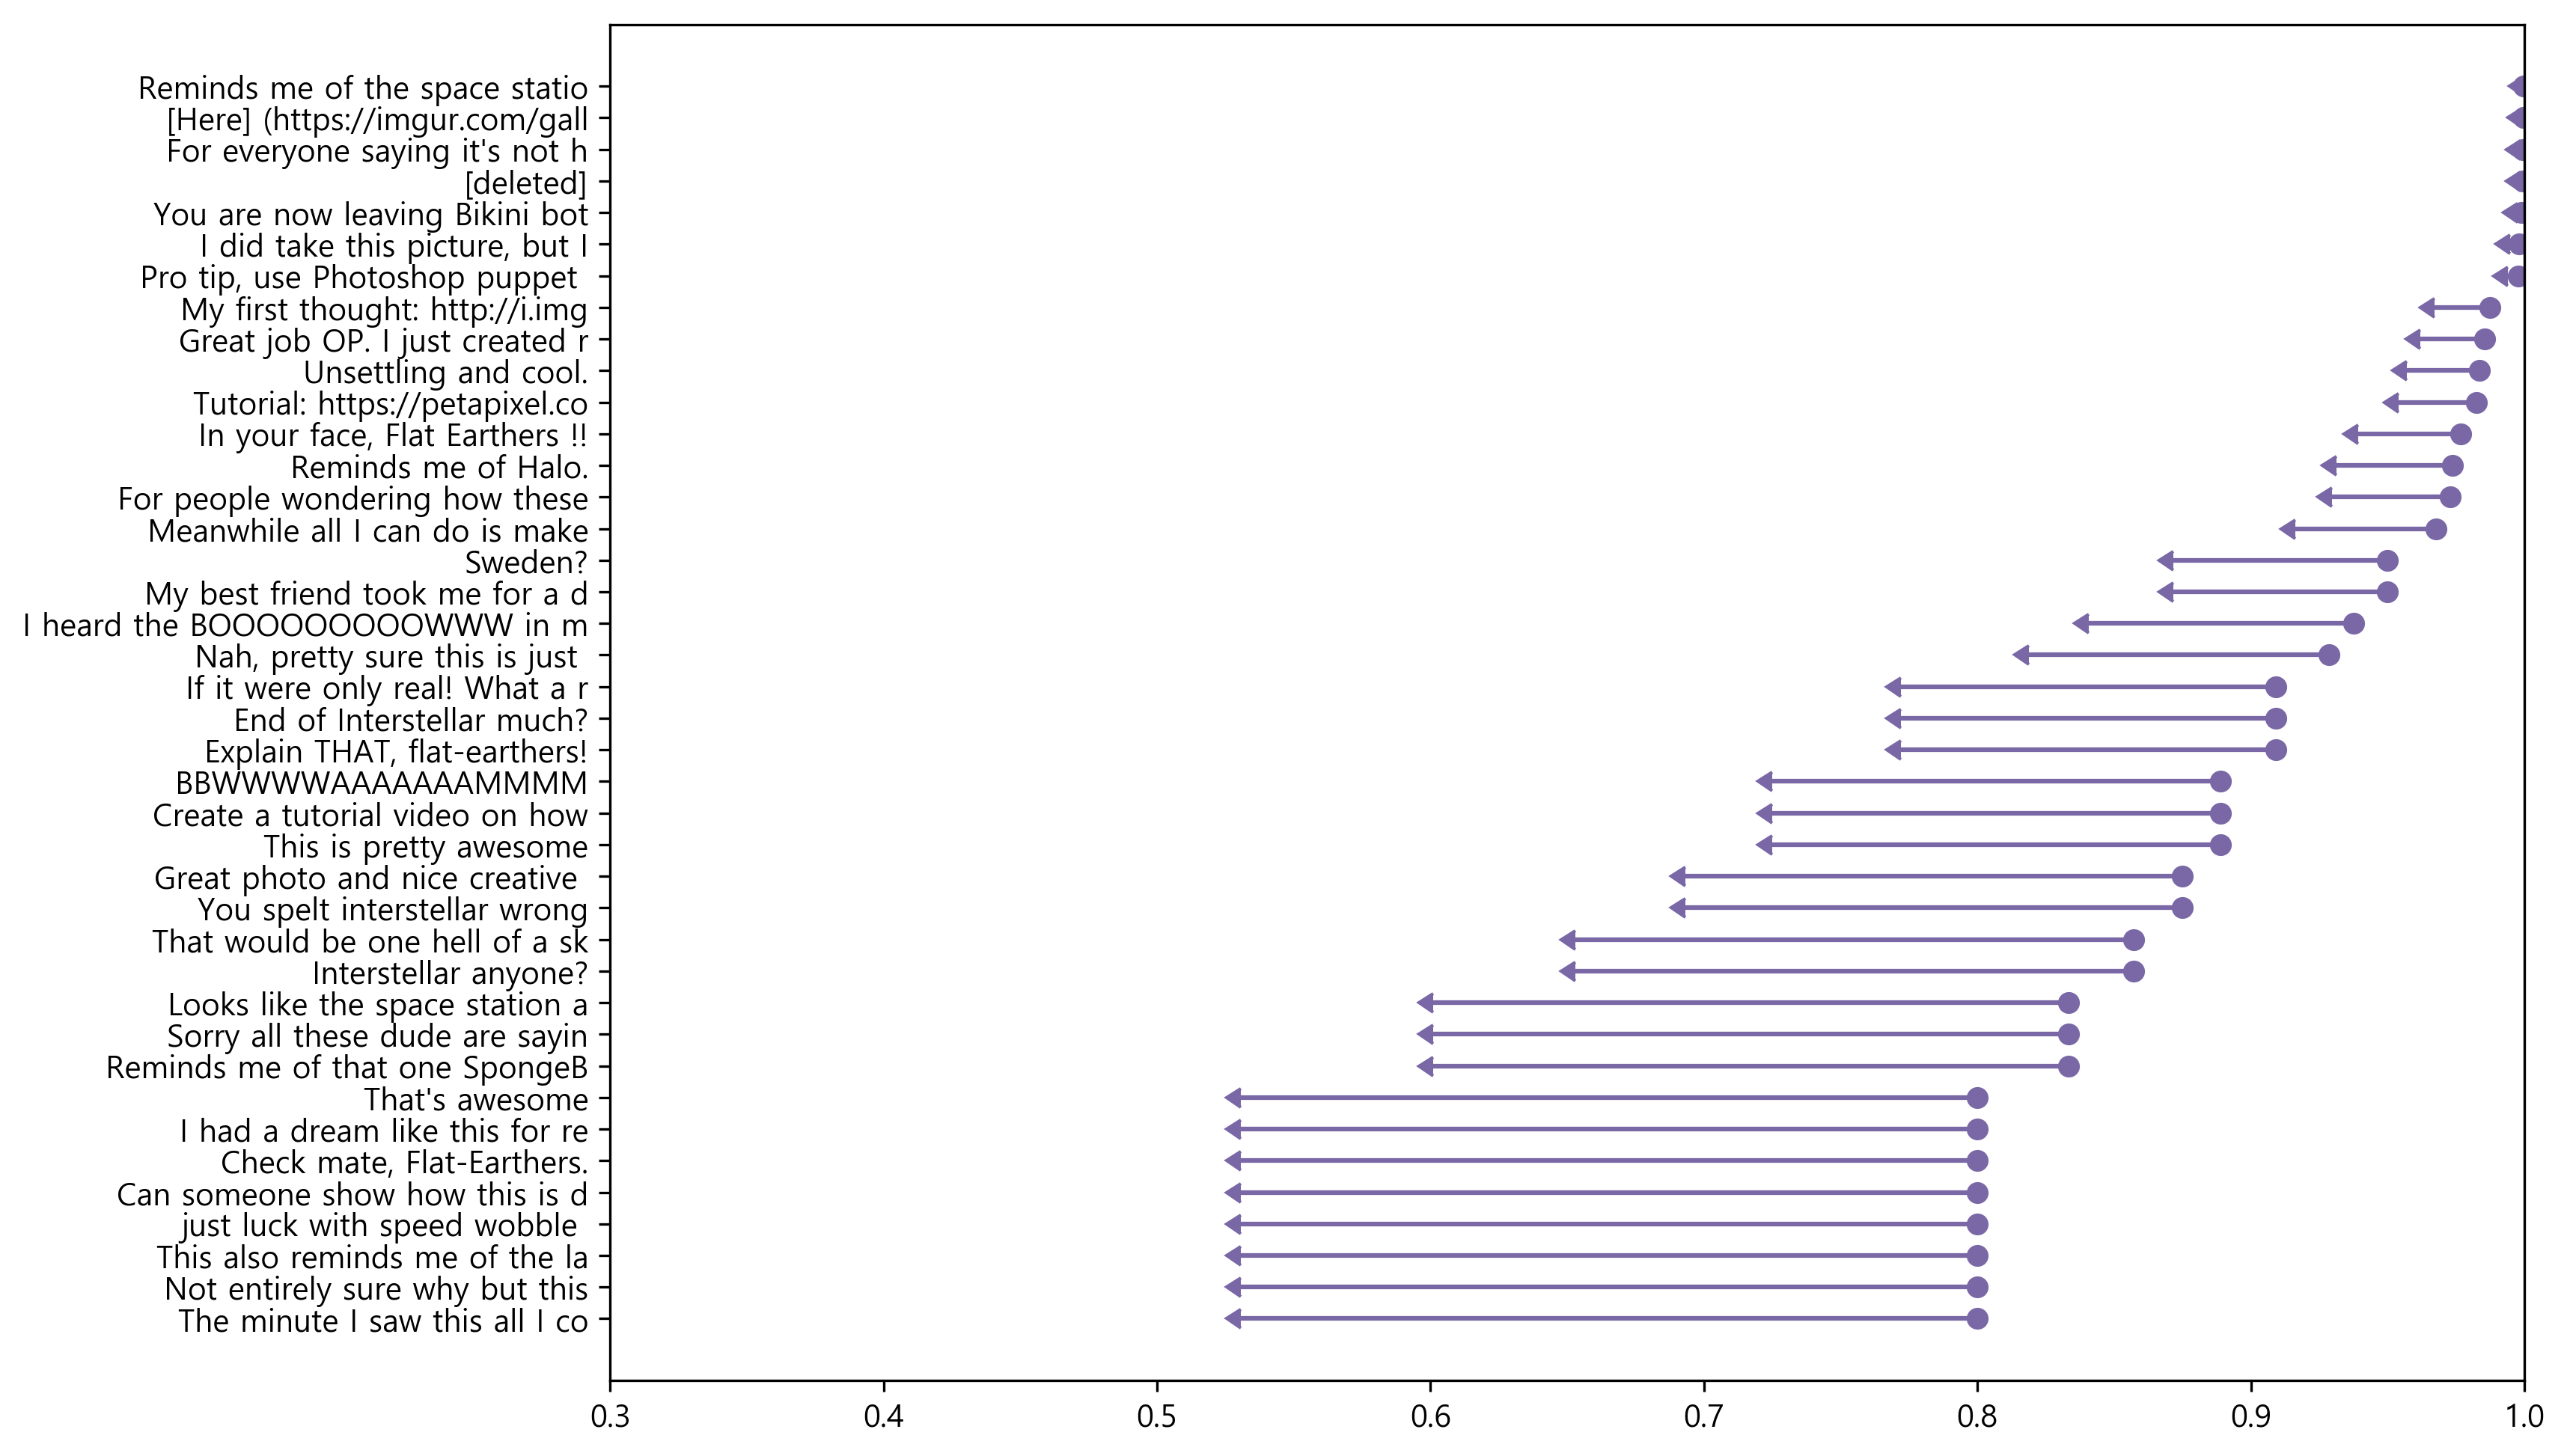

In [13]:
r_order = order[::-1][-40:]
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
             xerr=std_err[r_order],xuplims=True, capsize=0, fmt="o",color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1), map(lambda x: x[:30].replace("\n", ""), ordered_contents))
#plt.title("하단경계 기준으로 정렬한 상위 코멘트");

In [14]:
# Enter code here
# 아래에 코드를 입력하세요
import scipy.stats as stats
exp = stats.expon(scale=4)
N = int(1e5)
X = exp.rvs(N)

